In [81]:
import pandas as pd

In [82]:
pharma_sales_daily = pd.read_csv(r'./archive/salesdaily.csv')
pharma_sales_daily

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [83]:
pharma_sales_daily.info()
###### Columns info ######
# M01AB -> Acetic acid and derivatives
# M01AE -> Propionic acid and derivatives
# N02BA -> Salicylic acid and derivatives
# N02BE -> Anilides and pyrazoles
# N05B -> Anxiolytic drugs
# N05C -> Hypnotic and sedative drugs
# R03 -> Drugs for obstructive airway diseases
# R06 -> Antihistamines for systemic use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


array([[<Axes: title={'center': 'M01AB'}>,
        <Axes: title={'center': 'M01AE'}>,
        <Axes: title={'center': 'N02BA'}>],
       [<Axes: title={'center': 'N02BE'}>,
        <Axes: title={'center': 'N05B'}>,
        <Axes: title={'center': 'N05C'}>],
       [<Axes: title={'center': 'R03'}>, <Axes: title={'center': 'R06'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Hour'}>, <Axes: >]], dtype=object)

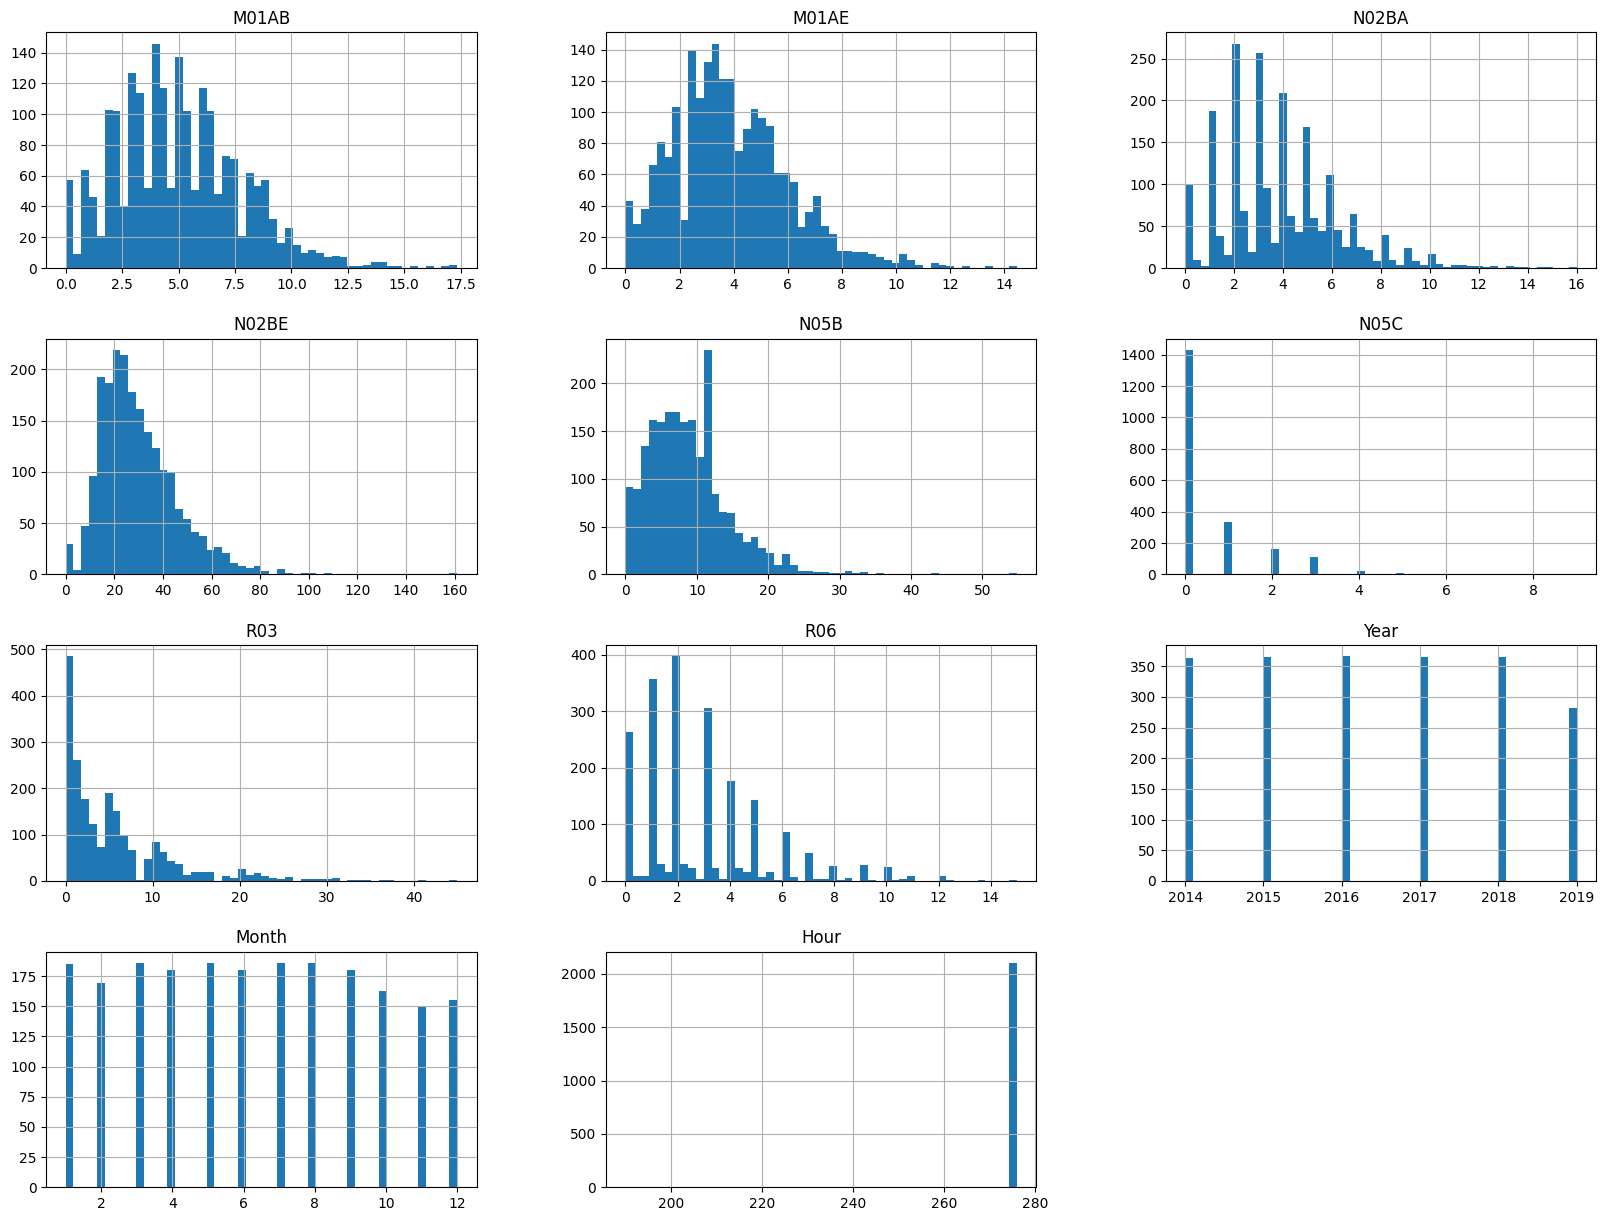

In [84]:
pharma_sales_daily.hist(bins =50, figsize=(20,15))

### Cleaning and Analysis

- Hour format is weird with values between 200 and 280, so will drop hour columns and take just valid entries like month, day and year
- Will study the sales evolution of drugs in the time period from 2014-2019
- Which is the month were people are buying more anxiolytics?
- Ratio between 2014 and 2019 drug sales

In [85]:
pharma_sales_daily.drop(columns=['Hour'], inplace=True)
pharma_sales_daily

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,Monday


(0.0, 15000.0)

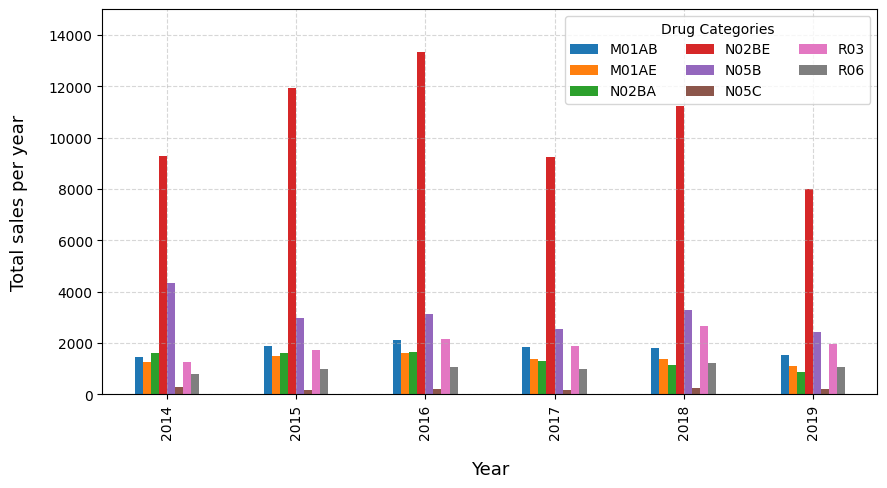

In [86]:
sales_time_evolution = pharma_sales_daily[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].groupby(pharma_sales_daily['Year']).sum().plot(kind='bar', figsize=(10,5))
sales_time_evolution.set_ylabel("Total sales per year", fontsize=13, labelpad=15)
sales_time_evolution.set_xlabel("Year", fontsize=13, labelpad=15)
sales_time_evolution.legend(title="Drug Categories", loc='upper right', ncols=3)
sales_time_evolution.grid(True, linestyle='--', alpha=0.5)
sales_time_evolution.set_ylim(0, 15000)

(0.0, 2500.0)

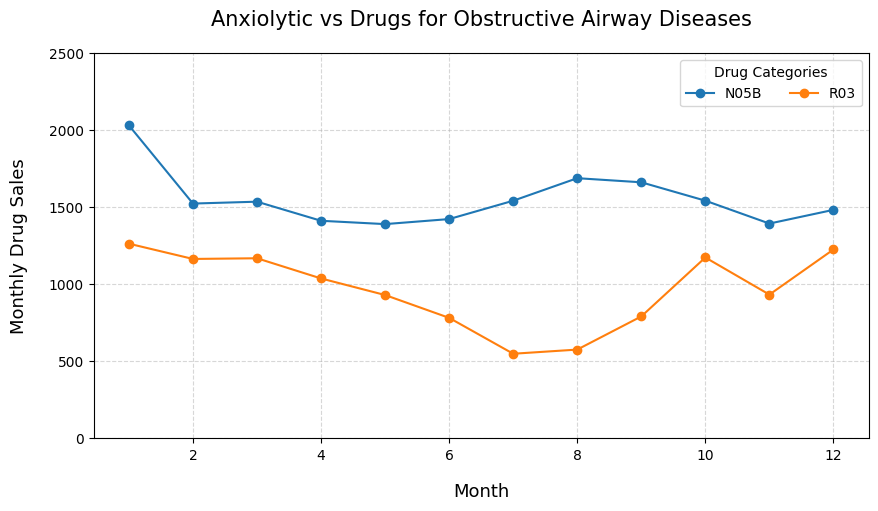

In [87]:
anxious_month = pharma_sales_daily[['N05B', 'R03']].groupby(pharma_sales_daily['Month']).sum().plot(kind='line', marker='o', figsize=(10,5))
anxious_month.set_ylabel("Monthly Drug Sales", fontsize=13, labelpad=15)
anxious_month.set_xlabel("Month", fontsize=13, labelpad=15)
anxious_month.legend(title="Drug Categories", loc='upper right', ncols=3)
anxious_month.grid(True, linestyle='--', alpha=0.5)
anxious_month.set_title("Anxiolytic vs Drugs for Obstructive Airway Diseases", fontsize=15, pad=20)
anxious_month.set_ylim(0, 2500)

### Conclusion
- Highest sales for anxiolytics are in January and August, maybe because hollidays are ending and people need to go back to work?
- Highest sales of drugs for obstructive airway diseases, are in agreement with the months were people have a tendency to catch colds (October, December and January)
- For every month the amount of anxiolytic sold is higher that drugs to treat diseases that obstruct airway

In [95]:
drug_columns = ['M01AB', 'M01AE', 'N02BA']
sum_first_3_df = pharma_sales_daily[['M01AB', 'M01AE', 'N02BA']].groupby(pharma_sales_daily['Year']).sum()
sum_first_3_df

,M01AB,M01AE,N02BA
Year,,,
2014,1447.215000,1257.104312,1616.466500
2015,1895.620000,1496.603000,1608.630000
2016,2107.285000,1589.441000,1655.216667
2017,1846.617083,1387.298333,1288.295833
2018,1786.930000,1389.656000,1123.800000
2019,1517.270000,1084.516000,879.800000


In [103]:
# Super interesting function 'shift' from pandas could be used to compare year over year changes
increments_df = (sum_first_3_df - sum_first_3_df.shift(1)) / sum_first_3_df * 100
increments_df

,M01AB,M01AE,N02BA
Year,,,
2014,NaN,NaN,NaN
2015,23.654794,16.002820,-0.487154
2016,10.044441,5.840921,2.814536
2017,-14.115970,-14.570959,-28.481101
2018,-3.340203,0.169658,-14.637465
2019,-17.772710,-28.136053,-27.733576


In [104]:
increments_df.dropna(inplace=True)
increments_df

,M01AB,M01AE,N02BA
Year,,,
2015,23.654794,16.002820,-0.487154
2016,10.044441,5.840921,2.814536
2017,-14.115970,-14.570959,-28.481101
2018,-3.340203,0.169658,-14.637465
2019,-17.772710,-28.136053,-27.733576


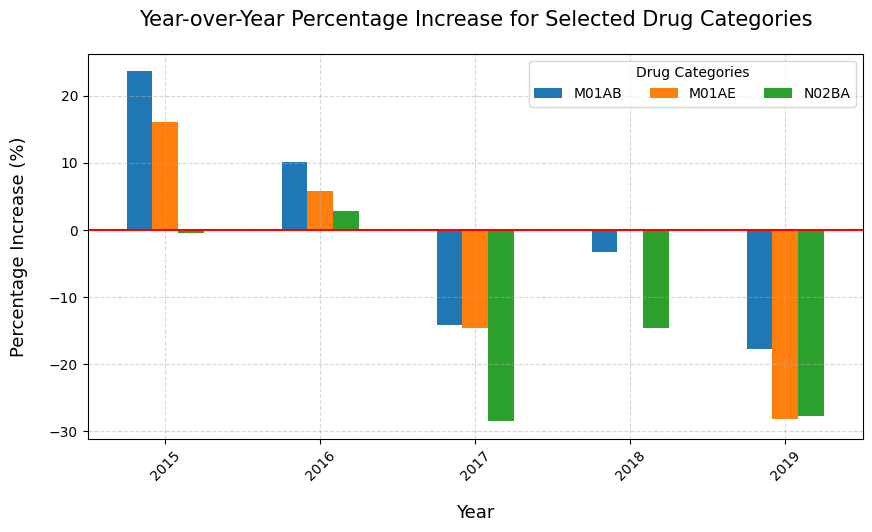

In [113]:
increments_figure = increments_df.plot(kind='bar', figsize=(10,5))
increments_figure.set_ylabel("Percentage Increase (%)", fontsize=13, labelpad=15)
increments_figure.set_xlabel("Year", fontsize=13, labelpad=15)
increments_figure.legend(title="Drug Categories", loc='upper right', ncols=3)
increments_figure.grid(True, linestyle='--', alpha=0.5)
increments_figure.set_title("Year-over-Year Percentage Increase for Selected Drug Categories", fontsize=15, pad=20)
increments_figure.hlines(y=0, xmin=-0.5, xmax=4.5,
                          color='red', linestyle='-')
increments_figure.tick_params(axis='x', labelrotation=45)